# An√°lise Comparativa de 30 Pa√≠ses: Fatores-Chave para a Facilidade de Neg√≥cios

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


- Dados

In [7]:
FILE = ['indicadores_paises_negocios.csv', 'cordenadas.csv']
df = pd.read_csv(FILE[0])
gdf = pd.read_csv(FILE[1])

In [8]:
display(df.head(10))
display(df.isnull().sum())
display(df.dtypes)
display(gdf.head())
display(gdf.dtypes)
display(gdf.isnull().sum())

Regi√£o           Pa√≠s  Taxa(%)  Infra-LPI  CPI PIB_USDbilh√µes  \
0  Europa W/N       Alemanha     15.8        4.1   78           4526   
1  Europa W/N         Fran√ßa     25.0        4.0   71           3052   
2  Europa W/N    Reino Unido     25.0        3.8   71           3381   
3  Europa W/N  Pa√≠ses Baixos     25.8        4.1   79           1118   
4  Europa W/N        B√©lgica     25.0        4.0   69            632   
5  Europa W/N         Su√©cia     20.6        4.0   82            593   
6  Europa W/N        Noruega     22.0        NaN   84            485   
7  Europa W/N      Dinamarca     22.0        4.1   90            404   
8  Europa W/N        Irlanda     12.5        3.6   77            545   
9  Europa W/N      Finl√¢ndia     20.0        4.2   88            300   

   Ease_of_Doing_Business_Position  
0                             22.0  
1                             32.0  
2                              8.0  
3                             24.0  
4                             46.0  
5                             10.0  
6                              9.0  
7                              4.0  
8                             24.0  
9                             20.0

Regi√£o                             0
Pa√≠s                               0
Taxa(%)                            0
Infra-LPI                          1
CPI                                0
PIB_USDbilh√µes                     0
Ease_of_Doing_Business_Position    4
dtype: int64

Regi√£o                              object
Pa√≠s                                object
Taxa(%)                            float64
Infra-LPI                          float64
CPI                                  int64
PIB_USDbilh√µes                      object
Ease_of_Doing_Business_Position    float64
dtype: object

Pa√≠s  Latitude  Longitude
0       Alemanha     51.00       9.00
1         Fran√ßa     48.85       2.35
2    Reino Unido     54.00      -2.00
3  Pa√≠ses Baixos     52.50       5.75
4        B√©lgica     50.85       4.35

Pa√≠s          object
Latitude     float64
Longitude    float64
dtype: object

Pa√≠s         0
Latitude     0
Longitude    0
dtype: int64

- Tratamento de tipos

In [9]:
df['PIB_USDbilh√µes'] = pd.to_numeric(df['PIB_USDbilh√µes'], errors='coerce')


- Preenchendo os valores nulos com o numero 0

In [10]:
col = ['Ease_of_Doing_Business_Position', 'Infra-LPI', 'PIB_USDbilh√µes']
for c in col:
  df[c] = df[c].fillna(0)

- Trocando os nomes das colunas

In [11]:
col = ['Regi√£o', 'Pa√≠s', 'Imposto', 'LPI', 'CPI', 'PIB', 'Facilidade Negocios']
df.columns = col

- Merge nas tabelas

In [12]:
df = pd.merge(df, gdf, on='Pa√≠s', how='inner')

- Exportando

In [ ]:
df.to_csv('indicadores_paises.csv', index=False)

In [13]:
df.head()

Regi√£o           Pa√≠s  Imposto  LPI  CPI     PIB  Facilidade Negocios  \
0  Europa W/N       Alemanha     15.8  4.1   78  4526.0                 22.0   
1  Europa W/N         Fran√ßa     25.0  4.0   71  3052.0                 32.0   
2  Europa W/N    Reino Unido     25.0  3.8   71  3381.0                  8.0   
3  Europa W/N  Pa√≠ses Baixos     25.8  4.1   79  1118.0                 24.0   
4  Europa W/N        B√©lgica     25.0  4.0   69   632.0                 46.0   

   Latitude  Longitude  
0     51.00       9.00  
1     48.85       2.35  
2     54.00      -2.00  
3     52.50       5.75  
4     50.85       4.35

**Filtrando os valores com z√©ro**

In [14]:
filter = (df['Facilidade Negocios'] > 0) & \
            (df['PIB'] > 0) & \
            (df['LPI'] > 0)
df_fil = df[filter]

# Melhor Infra Logistica

- LPI por pa√≠s

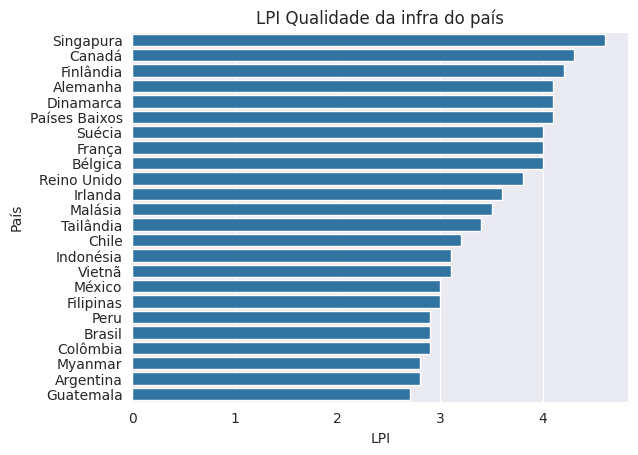

In [15]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='LPI', ascending=False),
    x='LPI',
    y='Pa√≠s'
)
plt.title('LPI Qualidade da infra do pa√≠s')
plt.xlabel('LPI')
plt.ylabel('Pa√≠s')
plt.show();

# Melhor pa√≠s para fazer negocios

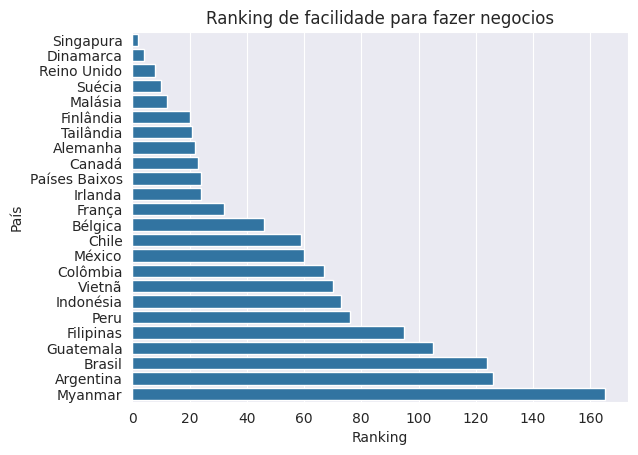

In [16]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='Facilidade Negocios', ascending=True),
    x='Facilidade Negocios',
    y='Pa√≠s'
)
plt.title('Ranking de facilidade para fazer negocios')
plt.xlabel('Ranking')
plt.ylabel('Pa√≠s')
plt.show();

# Correla√ß√£o linear entre os indicadores 'Facilidade Negocios' e 'LPI'

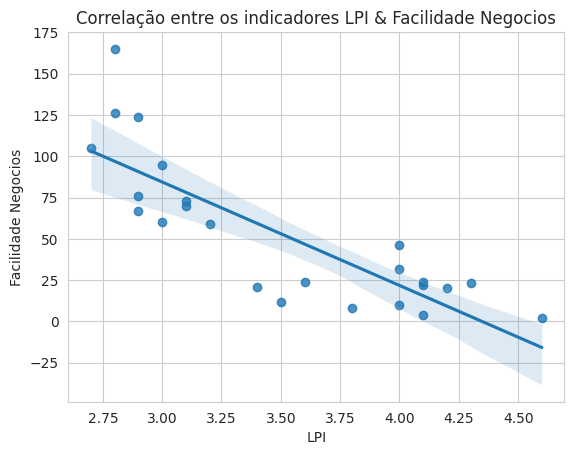

In [17]:
sns.set_style('whitegrid')
sns.regplot(
    data=df_fil,
    x='LPI',
    y='Facilidade Negocios'
)
plt.title('Correla√ß√£o entre os indicadores LPI & Facilidade Negocios')
plt.xlabel('LPI')
plt.ylabel('Facilidade Negocios')
plt.show();

A linha de regress√£o descendente significa que um **LPI maior** (melhor log√≠stica) est√° associado a uma **posi√ß√£o melhor** no ranking de facilidade para fazer neg√≥cios (valores mais baixos). üìâ

# Percepi√ß√£o da corrup√ß√£o

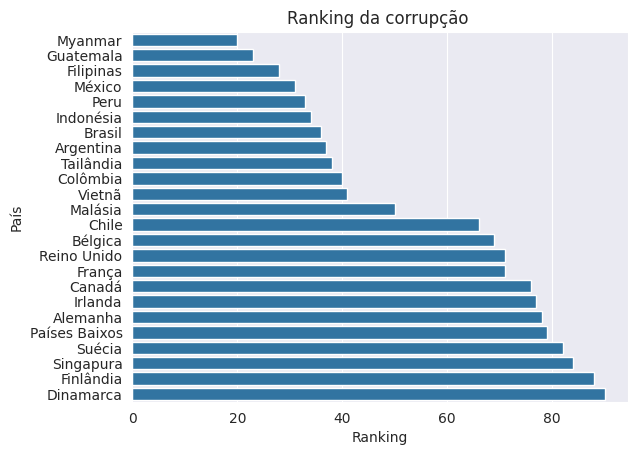

In [18]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='CPI', ascending=True),
    x='CPI',
    y='Pa√≠s'
)
plt.title('Ranking da corrup√ß√£o ')
plt.xlabel('Ranking')
plt.ylabel('Pa√≠s')
plt.show();

# PIB

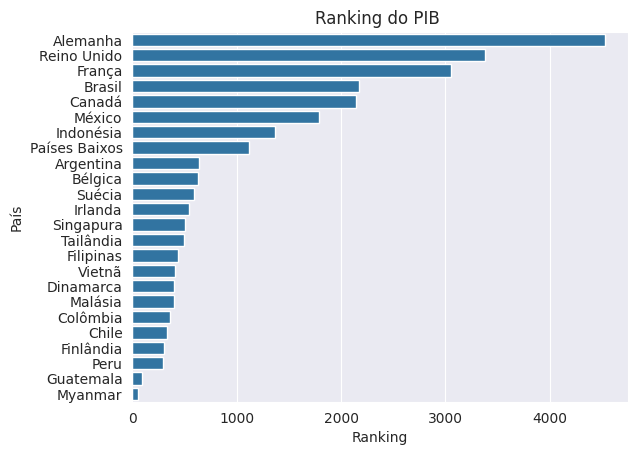

In [19]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='PIB', ascending=False),
    x='PIB',
    y='Pa√≠s'
)
plt.title('Ranking do PIB ')
plt.xlabel('Ranking')
plt.ylabel('Pa√≠s')
plt.show();

# Correla√ß√£o linear entre PIB  e CPI(Corrup√ß√£o)

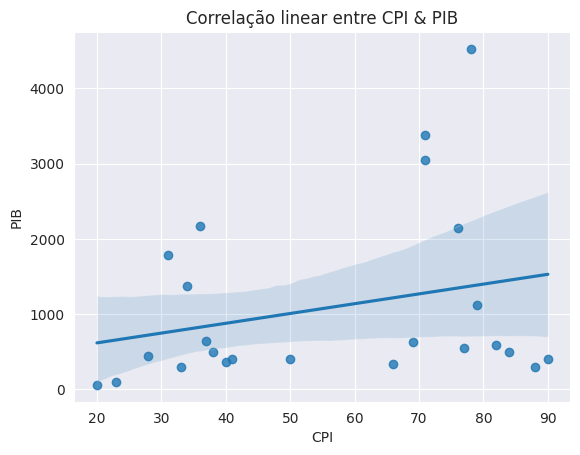

In [20]:
sns.set_style('darkgrid')
sns.regplot(
    data=df_fil,
    x='CPI',
    y='PIB'
)
plt.title('Correla√ß√£o linear entre CPI & PIB')
plt.xlabel('CPI')
plt.ylabel('PIB')
plt.show();

> A linha de regress√£o n√£o √© perfeita, mas indica uma tend√™ncia: quanto maior o CPI (√çndice de Percep√ß√£o da Corrup√ß√£o), mais alto o PIB.
> Na base de dados, temos pa√≠ses como M√©xico e Brasil, que t√™m um PIB elevado e um CPI baixo. Tamb√©m temos pa√≠ses como Su√©cia e Irlanda, que t√™m um PIB menor e uma baixa percep√ß√£o de corrup√ß√£o.


# Imposto

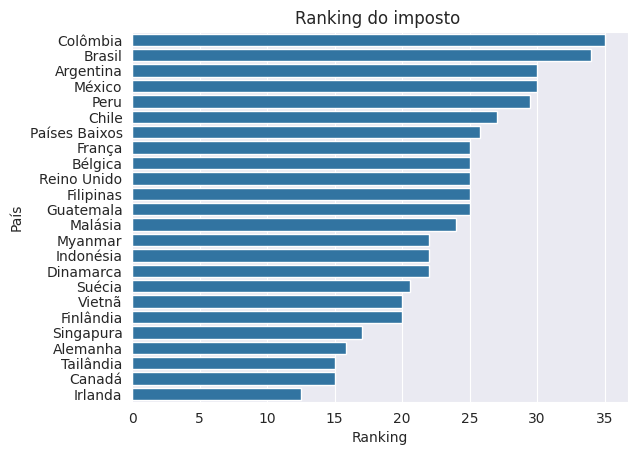

In [42]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='Imposto', ascending=False),
    x='Imposto',
    y='Pa√≠s'
)
plt.title('Ranking do imposto ')
plt.xlabel('Ranking')
plt.ylabel('Pa√≠s')
plt.show();

# Filtrando os pa√≠ses com os melhores indicadores
- Baixa corrup√ß√£o
- LPI elevado
- Facilidade para neg√≥cios

In [26]:
filter = (df_fil['LPI'] > 3.5) &\
         (df_fil['CPI'] > 60.0 ) &\
         (df_fil['Facilidade Negocios'] < 60)
country_great = df_fil[filter]

# Mapa dos pa√≠ses com os melhores indicadores

In [36]:

m = folium.Map(location=[40, 0], zoom_start=2)

for index, row in country_great.iterrows():
    popup_text = f"""
    <b>Pa√≠s:</b> {row['Pa√≠s']}<br>
    <b>Imposto:</b> {row['Imposto']}<br>
    <b>LPI:</b> {row['LPI']}<br>
    <b>Facilidade Neg√≥cios:</b> {row['Facilidade Negocios']}<br>
    <b>PIB:</b> {row['PIB']}<br>
    <b>CPI:</b> {row['CPI']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=200),
        tooltip=row['Pa√≠s']
    ).add_to(m)

m.save('mapa_paises_destaques.html')
m

# Mapa de todos os pa√≠ses

In [44]:

m = folium.Map(location=[40, 0], zoom_start=2)

for index, row in df_fil.iterrows():
    popup_text = f"""
    <b>Pa√≠s:</b> {row['Pa√≠s']}<br>
    <b>Imposto:</b> {row['Imposto']}<br>
    <b>LPI:</b> {row['LPI']}<br>
    <b>Facilidade Neg√≥cios:</b> {row['Facilidade Negocios']}<br>
    <b>PIB:</b> {row['PIB']}<br>
    <b>CPI:</b> {row['CPI']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=200),
        tooltip=row['Pa√≠s']
    ).add_to(m)

m.save('mapa_paises.html')

m